In [1]:
# STEGANOGRAPHY.py
import numpy as np
import cv2
import matplotlib.pyplot as plt

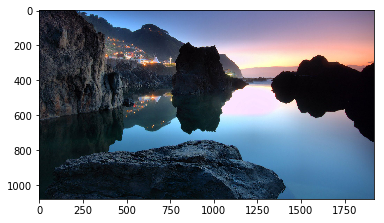

In [2]:
img = cv2.imread('img1.jpg')
img = np.array(img)
img[:,:,0],img[:,:,2] = img[:,:,2],img[:,:,0].copy()
plt.imshow(img)

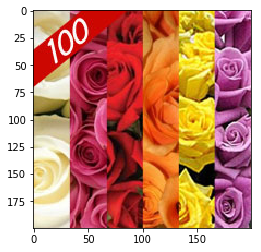

In [3]:
img2 = cv2.imread('img2.jpg')
img2 = np.array(img2)
img2[:,:,0],img2[:,:,2] = img2[:,:,2],img2[:,:,0].copy()
plt.imshow(img2)

In [4]:
print(img.shape)
print(img2.shape)

(1080, 1920, 3)
(200, 200, 3)


In [5]:
# function for steganography
def steganography(img, img2):
    for k in range(3):
        for i in range(img2.shape[0]):
            col = 0
            for j in range(img2.shape[1]):
                c = 0
                while c != 8:
                    if img[i][col][k] % 2:
                        img[i][col][k] -= 1
                    img[i][col][k] += img2[i][j][k] % 2
                    img2[i][j][k] //= 2
                    col = col + 1
                    c = c + 1
    return img          

In [6]:
steg = img.copy()
to_hide = img2.copy()
steg = steganography(steg,  to_hide)

True

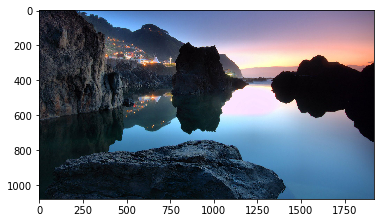

In [7]:
plt.imshow(steg)

steg2 = steg.copy()
steg2[:, :, 0], steg2[:, :, 2] = steg2[:, :, 2], steg2[:, :, 0].copy()
cv2.imwrite('STEGANOGRAPHY.png', steg2, [0]) # for preserving quality

In [8]:
# function for extracting image
def extraction(steg, shape):
    ext = np.zeros(shape, dtype = int)
    for k in range(3):
        for i in range(shape[0]):
            for j in range(shape[1] * 8):
                if j % 8 == 0:
                    pro = 1
                else:
                    pro *= 2
                ext[i][j // 8][k] += steg[i][j][k] % 2 * pro
    return ext

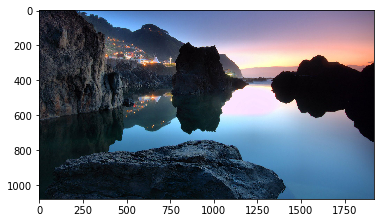

In [9]:
steg_img = cv2.imread('STEGANOGRAPHY.png', cv2.IMREAD_COLOR)
steg_img = np.array(steg_img)
steg_img[:, :, 0], steg_img[:, :, 2] = steg_img[:, :, 2], steg_img[:, :, 0].copy()
plt.imshow(steg_img)

In [10]:
# Extracting from steganographic image
extract = extraction(steg_img, img2.shape)

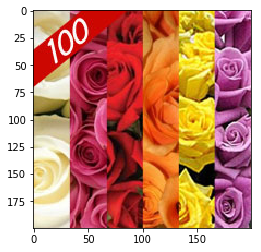

In [11]:
plt.imshow(extract)

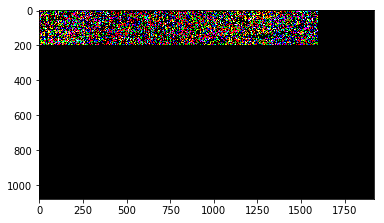

In [12]:
diff = img - steg
plt.imshow(diff)